In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [0]:

TrainData = pd.read_csv("/content/drive/My Drive/Data Science/DS/Python/DT&RF/R_Module_Day_12.1_Network_Intrusion_Train_data.csv")
TestData = pd.read_csv("//content/drive/My Drive/Data Science/DS/Python/DT&RF/R_Module_Day_12.3_Network_Intrusion_Test_data.csv")
TrainData.shape
TrainData.head()


duration protocol_type  ... dst_host_srv_rerror_rate    class
0         0           tcp  ...                     0.00   normal
1         0           udp  ...                     0.00   normal
2         0           tcp  ...                     0.00  anomaly
3         0           tcp  ...                     0.01   normal
4         0           tcp  ...                     0.00   normal

[5 rows x 42 columns]

In [0]:
# Create a new column. Call it "Source". Assign the value of "Train"  and "Test"in that column for Train and Test Dataset
TrainData["Source"] = "Train"
TestData["Source"] = "Test"

In [0]:
# Combine both datasets. Call it FullData
FullData = pd.concat([TrainData, TestData])
FullData.shape # Confirm that both datasets have been appended one below the other
# View head of the data
FullData.head()

duration protocol_type   service  ... dst_host_srv_rerror_rate    class  Source
0         0           tcp  ftp_data  ...                     0.00   normal   Train
1         0           udp     other  ...                     0.00   normal   Train
2         0           tcp   private  ...                     0.00  anomaly   Train
3         0           tcp      http  ...                     0.01   normal   Train
4         0           tcp      http  ...                     0.00   normal   Train

[5 rows x 43 columns]

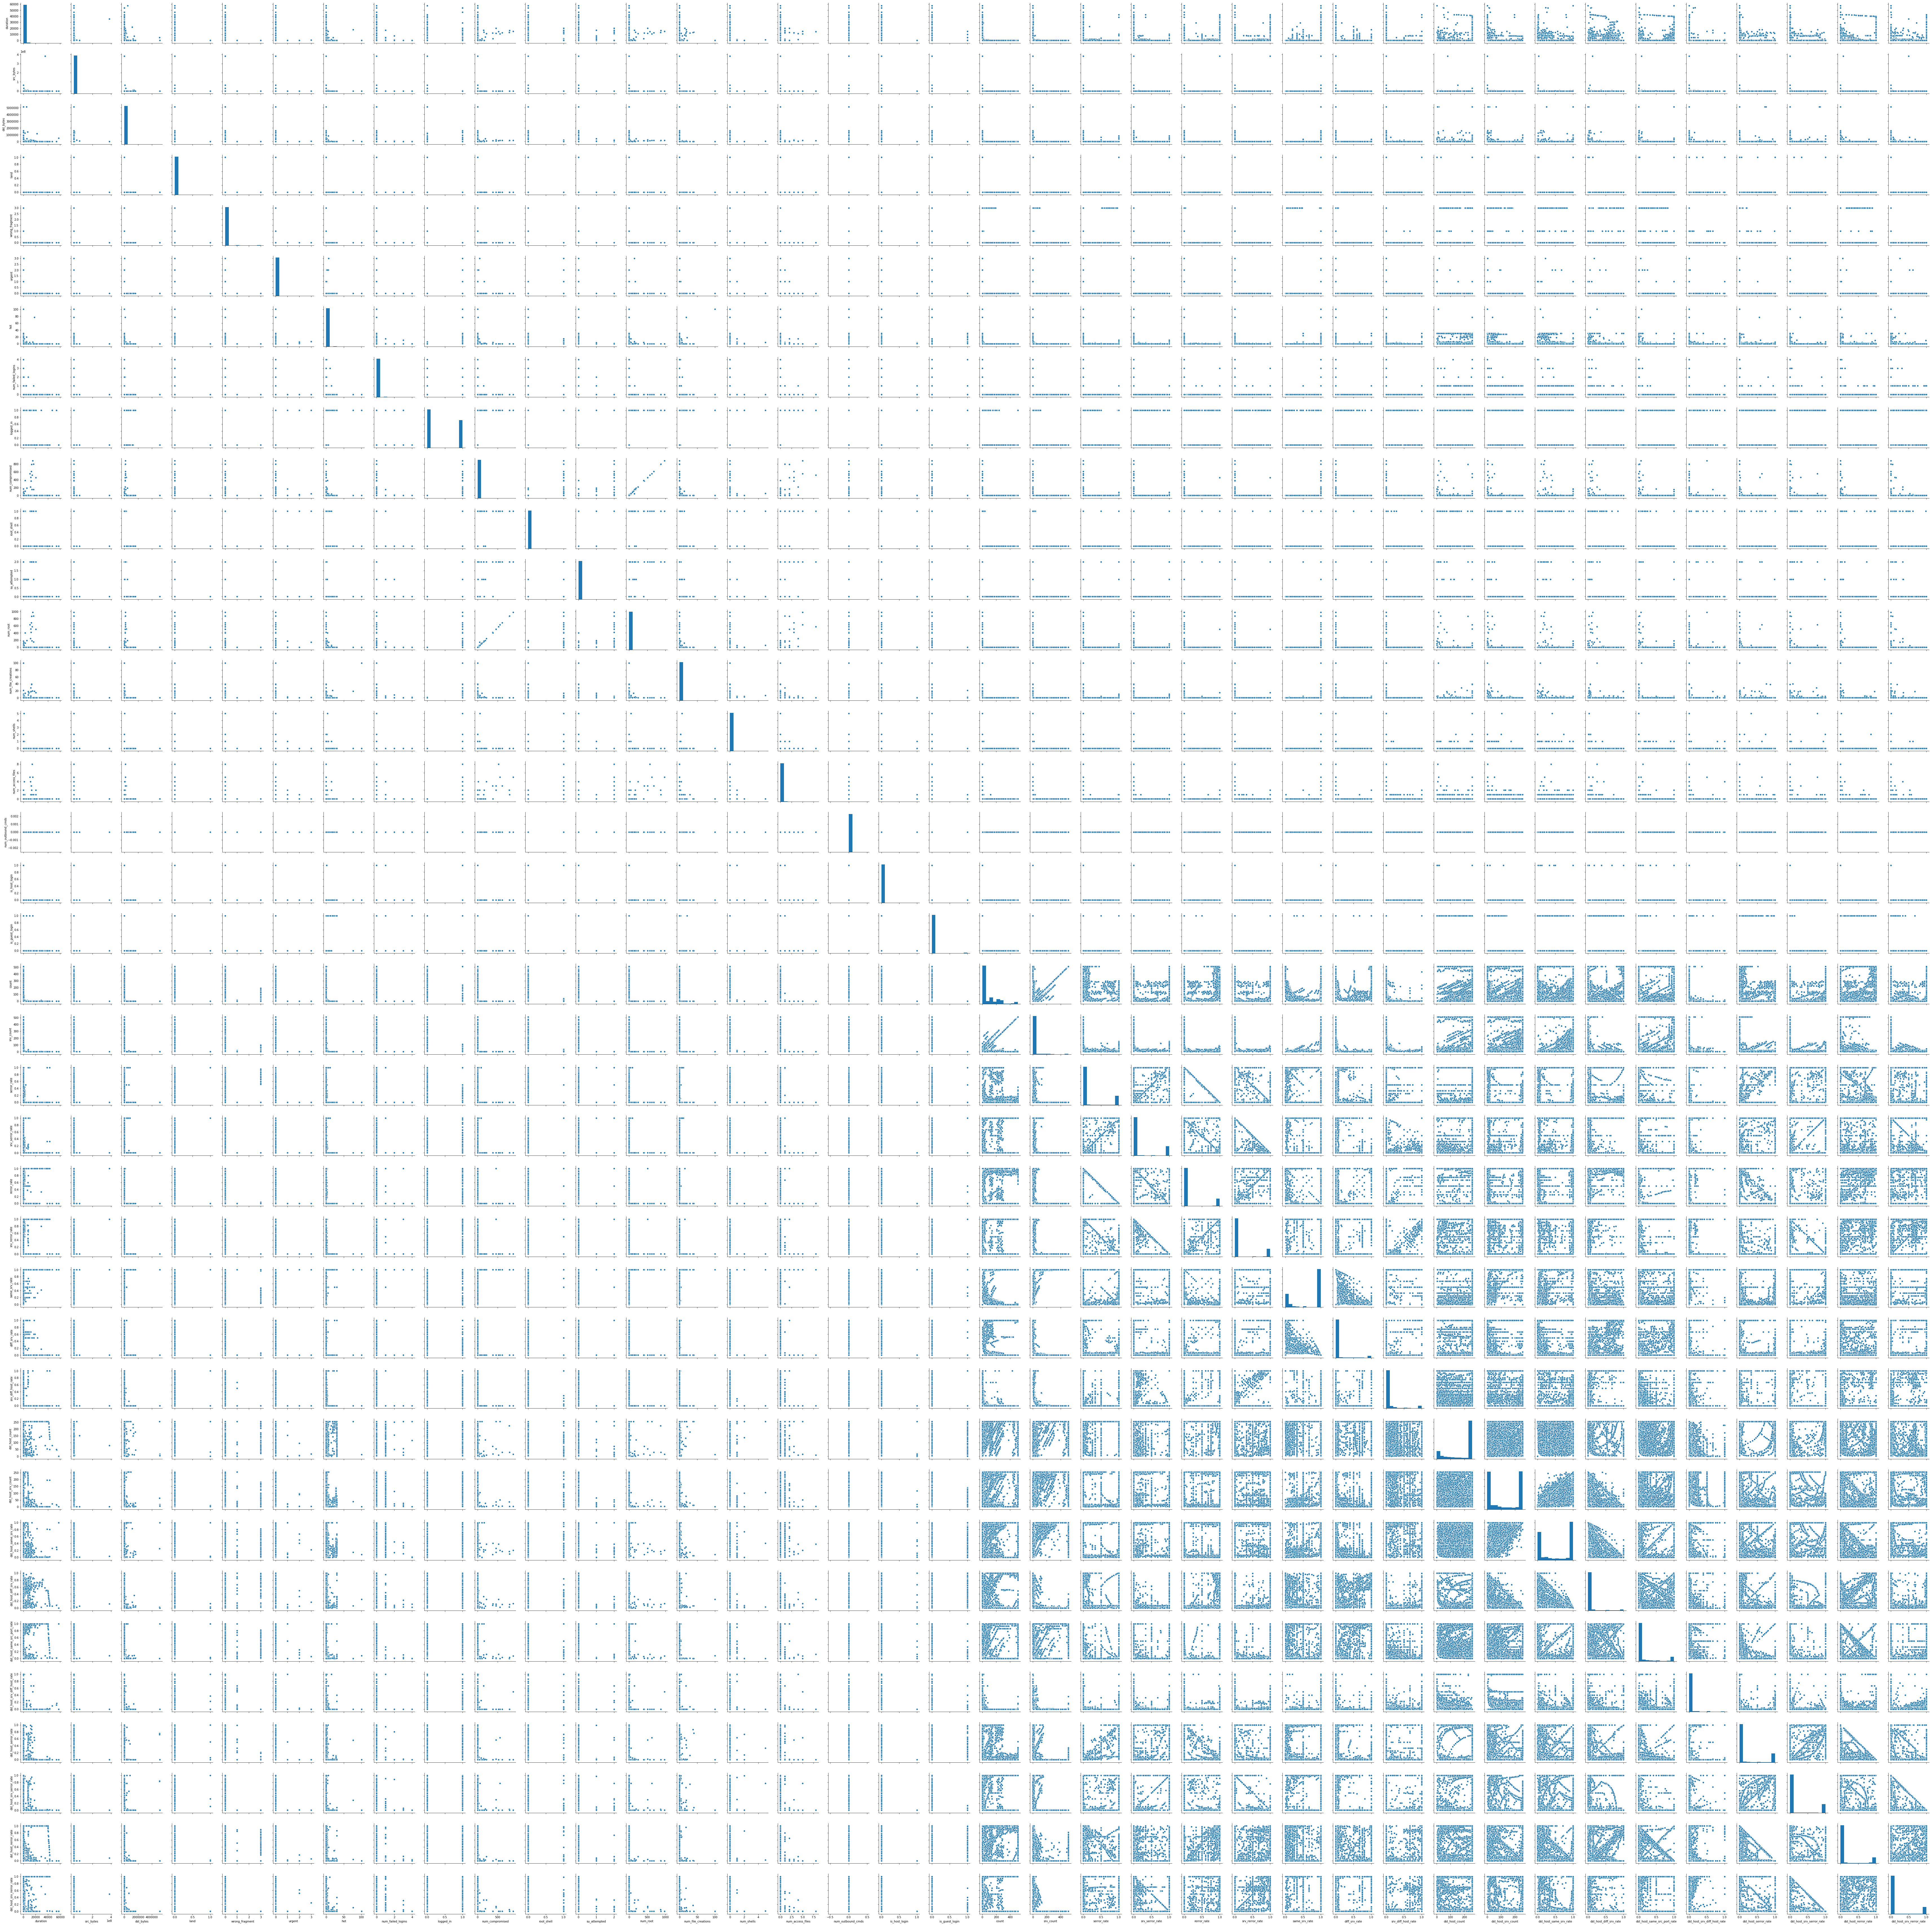

In [0]:
sns.pairplot(FullData)

In [0]:
# Check for NAs
#pd.DataFrame.isnull() # This should get you the help page for a function
#pd.DataFrame.sum()
FullData.isnull().sum() # returns the sum of NA values column wise

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [0]:
# Check the summary of the data
FullData.describe() # Returns summary for continuous vars
FullData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47736 entries, 0 to 22543
Data columns (total 43 columns):
duration                       47736 non-null int64
protocol_type                  47736 non-null object
service                        47736 non-null object
flag                           47736 non-null object
src_bytes                      47736 non-null int64
dst_bytes                      47736 non-null int64
land                           47736 non-null int64
wrong_fragment                 47736 non-null int64
urgent                         47736 non-null int64
hot                            47736 non-null int64
num_failed_logins              47736 non-null int64
logged_in                      47736 non-null int64
num_compromised                47736 non-null int64
root_shell                     47736 non-null int64
su_attempted                   47736 non-null int64
num_root                       47736 non-null int64
num_file_creations             47736 non-null int64
num_

In [0]:
#Handling the Outliers

def outiers_detection_correction(Variavle_List,FullData,Method='boxplot',percentile_upper_cap=99,
                                             percentile_lower_cap=1):
  if(Method=='boxplot'):
   
        for VarName in Variavle_List:
                       
            Q3=np.percentile(FullData.loc[FullData['Source']=='Train',VarName],75)
            Q1=np.percentile(FullData.loc[FullData['Source']=='Train',VarName],25)
             
            Upper = Q3 + 1.5*(Q3-Q1)
            Lower = Q1 - 1.5*(Q3-Q1)

            FullData[VarName]=np.where(FullData[VarName]>Upper,Upper,FullData[VarName])
            FullData[VarName]=np.where(FullData[VarName]<Lower,Lower,FullData[VarName])
              
        return(FullData)
         
  elif(Method=='percentile'):
    for VarName in Variavle_List:
      percentile_upper_cap_value=np.percentile(FullData.loc[FullData['Source']=='Train',VarName],percentile_upper_cap)
      percentile_lower_cap_value=np.percentile(FullData.loc[FullData['Source']=='Train',VarName],percentile_lower_cap)
         
    return(FullData)

  else:
            print("InCorrect Function Call")
            return(FullData)

Var_List = FullData.loc[:,(FullData.dtypes != object)].columns
Var_List = Var_List.drop(['land', 'logged_in',  'is_host_login' ])
len(Var_List)
FullData=outiers_detection_correction(Var_List,FullData,Method='percentile',percentile_upper_cap=99,
                                 percentile_lower_cap=99)





In [0]:
list(FullData)
FullData.columns
#Check for Imablancenance in DataSet
FullData['class'].value_counts()


anomaly    24576
normal     23160
Name: class, dtype: int64

In [0]:
###############################################
#Removing the variables having high correlation
###############################################
#Crrelation Matrix
corr_matrix = FullData.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_rerror_rate']

In [0]:
FullData.shape
FullData = FullData.drop(to_drop, axis = 1).copy()
FullData.shape

(47736, 37)

In [0]:
## Explanation of the above statement
a = (FullData.dtypes == object)
a.index # By default, index is considered
a.values
#FullData.loc[:,a.index].nunique() # solution with loc (column name output)
FullData.iloc[:,a.values].nunique() # solution with iloc (boolean output)

protocol_type     3
service          67
flag             11
class             2
Source            2
dtype: int64

In [0]:
#Converting all service attribute 67 categories into the Dummy variables leads to Curse of Dimenstionality
# Combining "service" variable categories.
# Step 1: Check "similarity" in proportions of different categories w.r.t. the dependent variable
D1 = pd.crosstab(TrainData['service'], TrainData['class'], margins = True)
D1['Anomaly_Proportion'] = round(D1['normal']/D1['All'],3)
D1

class       anomaly  normal    All  Anomaly_Proportion
service                                               
IRC               0      40     40               1.000
X11               3      19     22               0.864
Z39_50          172       0    172               0.000
auth            148      41    189               0.217
bgp             146       0    146               0.000
courier         164       0    164               0.000
csnet_ns        111       0    111               0.000
ctf             127       0    127               0.000
daytime         107       0    107               0.000
discard         105       0    105               0.000
domain          100       9    109               0.083
domain_u          3    1817   1820               0.998
echo             65       0     65               0.000
eco_i           816      93    909               0.102
ecr_i           575      38    613               0.062
efs             110       0    110               0.000
exec             91       0     91               0.000
finger          249     117    366               0.320
ftp             169     176    345               0.510
ftp_data        395    1001   1396               0.717
gopher          109       0    109               0.000
hostnames        96       0     96               0.000
http            439    7564   8003               0.945
http_443        113       0    113               0.000
http_8001         1       0      1               0.000
imap4           138       0    138               0.000
iso_tsap        131       0    131               0.000
klogin           92       0     92               0.000
kshell           67       0     67               0.000
ldap             90       0     90               0.000
...             ...     ...    ...                 ...
netstat          78       0     78               0.000
nnsp            123       0    123               0.000
nntp             61       0     61               0.000
ntp_u             0      32     32               1.000
other           339     519    858               0.605
pm_dump           3       0      3               0.000
pop_2            17       0     17               0.000
pop_3            19      34     53               0.642
printer          12       0     12               0.000
private        4152     199   4351               0.046
red_i             0       3      3               1.000
remote_job       17       0     17               0.000
rje              20       0     20               0.000
shell            10       1     11               0.091
smtp             59    1390   1449               0.959
sql_net          46       0     46               0.000
ssh              58       0     58               0.000
sunrpc           67       0     67               0.000
supdup          114       0    114               0.000
systat           88       0     88               0.000
telnet          274     209    483               0.433
tim_i             2       0      2               0.000
time            135      20    155               0.129
urh_i             0       4      4               1.000
urp_i             1     123    124               0.992
uucp            157       0    157               0.000
uucp_path       133       0    133               0.000
vmnet           107       0    107               0.000
whois           145       0    145               0.000
All           11743   13449  25192               0.534

[67 rows x 4 columns]

In [0]:
# Step 2: Make a copy of the original column "service" in the Fulldata and call it Service_New
FullData['Service_New'] = FullData['service']

# Create a new Category "Serv_Cat_1" where  'Anomaly_Proportion'  is 0
Temp_Serv_Cat = D1.index[D1['Anomaly_Proportion'] == 0]
FullData.Service_New = np.where(FullData.Service_New.isin(Temp_Serv_Cat), "Serv_Cat_1", FullData.Service_New)

In [0]:
# Check the number of unique categories
FullData.service.nunique()
FullData.Service_New.nunique() # Should have reduced to a reasonably lower number of categories

24

In [0]:
# Remove original "service" column
FullData2 = FullData.drop(['service'], axis = 1).copy()

In [0]:

########################
# Dummy variable creation
########################

# Create dummy variables from all indep categorical variables

# Step 1: Identify categorical vars
Categ_Vars = FullData2.loc[:,FullData2.dtypes == object].columns
print("All Categorical Variables",Categ_Vars) 

# Step 2: Create dummy vars
Dummy_Df = pd.get_dummies(FullData2[Categ_Vars].drop(['Source'], axis = 1), drop_first=True, dtype = int)
Dummy_Df.shape
Dummy_Df.columns
Dummy_Df.dtypes
Dummy_Df


All Categorical Variables Index(['protocol_type', 'flag', 'class', 'Source', 'Service_New'], dtype='object')


protocol_type_tcp  ...  Service_New_urp_i
0                      1  ...                  0
1                      0  ...                  0
2                      1  ...                  0
3                      1  ...                  0
4                      1  ...                  0
5                      1  ...                  0
6                      1  ...                  0
7                      1  ...                  0
8                      1  ...                  0
9                      1  ...                  0
10                     1  ...                  0
11                     1  ...                  0
12                     1  ...                  0
13                     1  ...                  0
14                     1  ...                  0
15                     1  ...                  0
16                     1  ...                  0
17                     0  ...                  0
18                     1  ...                  0
19                     1  ...                  0
20                     1  ...                  0
21                     1  ...                  0
22                     1  ...                  0
23                     0  ...                  0
24                     1  ...                  0
25                     1  ...                  0
26                     1  ...                  0
27                     1  ...                  0
28                     1  ...                  0
29                     1  ...                  0
...                  ...  ...                ...
22514                  0  ...                  0
22515                  1  ...                  0
22516                  1  ...                  0
22517                  1  ...                  0
22518                  1  ...                  0
22519                  1  ...                  0
22520                  1  ...                  0
22521                  0  ...                  0
22522                  1  ...                  0
22523                  1  ...                  0
22524                  1  ...                  0
22525                  1  ...                  0
22526                  1  ...                  0
22527                  1  ...                  0
22528                  0  ...                  0
22529                  1  ...                  0
22530                  1  ...                  0
22531                  1  ...                  0
22532                  1  ...                  0
22533                  1  ...                  0
22534                  1  ...                  0
22535                  1  ...                  0
22536                  1  ...                  0
22537                  1  ...                  0
22538                  0  ...                  0
22539                  1  ...                  0
22540                  1  ...                  0
22541                  1  ...                  0
22542                  0  ...                  0
22543                  1  ...                  0

[47736 rows x 36 columns]

In [0]:
# Step 3: Append the Dummy_Df with FullData2. Call it FullData3
FullData3 = pd.concat([FullData2, Dummy_Df], axis = 1)
FullData3.shape
FullData3.dtypes 

# Step 4.1: Drop all the irrelavant and categorical columns (Do NOT drop Source column - We need it for sample splitting)

Cols_To_Drop = Categ_Vars.drop('Source') # Ensure you do not consider 'Source' column in "columns to drop"

#Cols_To_Drop = Categ_Vars_list.remove('Source')

# Step 4.2
FullData4 = FullData3.drop(Cols_To_Drop, axis = 1).copy()
FullData4.shape
FullData4.head(5)


duration  src_bytes  ...  Service_New_urh_i  Service_New_urp_i
0         0        491  ...                  0                  0
1         0        146  ...                  0                  0
2         0          0  ...                  0                  0
3         0        232  ...                  0                  0
4         0        199  ...                  0                  0

[5 rows x 69 columns]

In [0]:
########################
# Sampling
########################

# Divide the data into Train and Test based on Source column and 
# make sure you drop the source column
Train = FullData4.loc[FullData4.Source == "Train",].drop('Source', axis = 1).copy()
Train.shape
Test = FullData4.loc[FullData4.Source == "Test",].drop('Source', axis = 1).copy()
Test.shape

# Divide each dataset into Indep Vars and Dep var
Train_X = Train.drop('class_normal', axis = 1).copy()
Train_Y = Train['class_normal'].copy()
Test_X = Test.drop('class_normal', axis = 1).copy()
Test_Y = Test['class_normal'].copy()

In [0]:
#Selecting the best feature based on decrease in gini index
# from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier()

# fit random forest classifier on the training set
#rfc.fit(Train_X, Train_Y)
# extract important features
#score = np.round(rfc.feature_importances_,3)
#importances_df = pd.DataFrame({'feature':Train_X.columns,'importance':score})
#importances_df = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
#plt.rcParams['figure.figsize'] = (11, 4)
#importances_df.plot.bar();

#from sklearn.feature_selection import RFE
#import itertools
#rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
#rfe = RFE(rfc, n_features_to_select=30)
#rfe = rfe.fit(Train_X, Train_Y)

# summarize the selection of the attributes
#feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), Train_X.columns)]
#selected_features = [v for i, v in feature_map if i==True]

#Train_X = Train_X.drop(selected_features, axis=1)
#Test_X = Test_X.drop(selected_features, axis=1)


In [0]:
########################################
# Decision Tree Model
########################################

from sklearn.tree import DecisionTreeClassifier

M1 = DecisionTreeClassifier(random_state=100)
M1_Model = M1.fit(Train_X, Train_Y)


In [0]:
########################################
# Model Visualization
########################################

# Step 1: Import
import pydotplus # If error, follow the below instructions for library installation

# Step 2: install
# install package directly from within spyder: !pip install pydotplus
# pip is a package management system used to install and 
# manage packages written in Python
#!pip install pydotplus

# Step 3: validate if the installation has come through
#import pydotplus # No Error

from sklearn.tree import export_graphviz
# Step 1: Download the following software (Graphviz):
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html

# Step 2: Add the installed path to environment variable
# C:\Program Files (x86)\Graphviz2.34\bin
# Environment variables: Right click "My Computer" -> Properties -> Advanced -> Click "Path" in both sections and add the installed path's bin folder there

# Step 2.1: Restart spyder
# Step 3: Python implementation
# Create DOT data (DOT format is a format to store grpahical data in text format)
dot_data = export_graphviz(M1, out_file=None, feature_names = Train_X.columns)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph (on console) # Takes a bit of time
#Image(graph.create_png())

# Write to file
#graph.write_pdf("DT_Plot.pdf")




In [0]:
########################################
# Model Prediction and Validation
########################################

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Prediction on testset
Test_Pred = M1_Model.predict(Test_X)

# Classification Model Validation
Confusion_Mat = confusion_matrix(Test_Y, Test_Pred)
Confusion_Mat # R, C format (Actual = Test_Y, Predicted = Test_Pred)

# Accuracy
accuracy = ((Confusion_Mat[0,0] + Confusion_Mat[1,1])/Test_Y.shape[0])*100
print("Acuuracy of Model is:",accuracy)
#(sum(np.diag(Confusion_Mat))/Test_Y.shape[0])*100 # Using np.diag to fetch diag values from confusion matrix

# Classification Model Report
Report = classification_report(Test_Y, Test_Pred)
print(Report) # Use print() to see a well formatted output


Acuuracy of Model is: 81.0903122782115
              precision    recall  f1-score   support

           0       0.95      0.70      0.81     12833
           1       0.71      0.95      0.81      9711

    accuracy                           0.81     22544
   macro avg       0.83      0.83      0.81     22544
weighted avg       0.85      0.81      0.81     22544



In [0]:
########################################
# Random Forest
########################################

from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier()
M1 = RandomForestClassifier(random_state = 100)
M1_Model = M1.fit(Train_X, Train_Y)
Test_Pred = M1_Model.predict(Test_X)
M1_Model.feature_importances_

# Variable importance
#Var_Importance_Df = pd.concat([pd.DataFrame(M1_Model.feature_importances_), pd.DataFrame(Train_X.columns)], axis = 1)
#Var_Importance_Df
#Var_Importance_Df.to_csv("Var_Importance_Df.csv", index = False)

#Var_Importance_Df2 = round(Var_Importance_Df[0], 3)

# Confusion Matrix
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
Confusion_Mat = confusion_matrix(Test_Y, Test_Pred) # R, C format (Actual = Test_Y, Predicted = Test_Pred)
Confusion_Mat 

# Accuracy
Accuracy = ((Confusion_Mat[0,0] + Confusion_Mat[1,1])/Test_Y.shape[0])*100
print("Acuuracy of Model is:",Accuracy)
#(sum(np.diag(Confusion_Mat))/Test_Y.shape[0])*100 # Using np.diag to fetch diag values from confusion matrix

# Classification Model Validation
Report = classification_report(Test_Y, Test_Pred)
# Report # RS: Dont just write Report and press F9. Its output is not well formatted. Use print(Report) instead
print(Report)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Acuuracy of Model is: 81.27661462029808
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     12833
           1       0.71      0.97      0.82      9711

    accuracy                           0.81     22544
   macro avg       0.84      0.83      0.81     22544
weighted avg       0.86      0.81      0.81     22544



In [0]:
########################################
# Random Forest using GridSearch
########################################

#from sklearn.model_selection import GridSearchCV
#
#param_grid = [{'n_estimators': [25, 50, 75], 'min_samples_split': [5, 10]}]
#RF_GS = GridSearchCV(RandomForestClassifier(random_state=100), param_grid=param_grid,  scoring='accuracy', cv=3)
## Other scoring parameters are available here: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#
#RF_GS_Model = RF_GS.fit(Train_X, Train_Y)
#RF_GS_Model.cv_results_
#
#RF_Grid_Search_Df = pd.DataFrame.from_dict(RF_GS_Model.cv_results_)
#
## Best tuning parameters
#RF_GS_Model.best_params_
#
## Use the best parameters configuration to build the final model.


In [0]:
########################################
# Random Forest using RandomSearch
########################################

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# param_grid is a dictionary
param_grid = {'n_estimators': [25, 50, 75,100,200], 'max_features': [5, 7, 9, 11,13,15,17],
              'min_samples_split' : [1000,1500, 2000,2500,3000,3500,5000]} 
RF_RS = RandomizedSearchCV(RandomForestClassifier(random_state=100), param_distributions=param_grid,  scoring='accuracy', cv=3)
# Other scoring parameters are available here: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

RF_RS_Model = RF_RS.fit(Train_X, Train_Y)

RF_Random_Search_Df = pd.DataFrame.from_dict(RF_RS_Model.cv_results_)


# Best tuning parameters
RF_RS_Model.best_params_

i = RF_RS_Model.best_params_['max_features']
j = RF_RS_Model.best_params_['min_samples_split']
k= RF_RS_Model.best_params_['n_estimators'] 



In [0]:
########################################
# Random Forest using best optimal parameter
########################################

from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier()
M1 = RandomForestClassifier(max_features= i, min_samples_split= j, n_estimators= k)
M1_Model = M1.fit(Train_X, Train_Y)
Test_Pred = M1_Model.predict(Test_X)
M1_Model.feature_importances_

# Confusion Matrix
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
Confusion_Mat = confusion_matrix(Test_Y, Test_Pred) # R, C format (Actual = Test_Y, Predicted = Test_Pred)
Confusion_Mat 

# Accuracy
Accuracy = ((Confusion_Mat[0,0] + Confusion_Mat[1,1])/Test_Y.shape[0])*100
print(Accuracy)
#(sum(np.diag(Confusion_Mat))/Test_Y.shape[0])*100 # Using np.diag to fetch diag values from confusion matrix

# Classification Model Validation
Report = classification_report(Test_Y, Test_Pred)
# Report # RS: Dont just write Report and press F9. Its output is not well formatted. Use print(Report) instead
print(Report)

77.61710432931157
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     12833
           1       0.66      0.97      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.81      0.80      0.78     22544
weighted avg       0.84      0.78      0.77     22544



In [0]:
########################################
#SVM
########################################

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
my_param_grid = {'C': [1, 2], 'gamma': [0.01, 0.1], 'kernel': ['sigmoid','rbf']} # my_param_grid is a dictionary
SVM_GS = GridSearchCV(SVC(), param_grid=my_param_grid,  scoring='accuracy', cv=3)
# Other scoring parameters are available here: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

SVM_GS_Model = SVM_GS.fit(Train_X, Train_Y)

# Result in dictionary format
SVM_GS_Model.cv_results_
# # Best tuning parameters
SVM_GS_Model.best_params_

# Result in a dataframe
SVM_Grid_Search_Df = pd.DataFrame.from_dict(SVM_GS_Model.cv_results_)

SVM_Model = SVC(C=2, gamma=0.01,kernel='rbf')
SVM_Model = SVM_Model.fit(Train_X,Train_Y)
Test_pred = SVM_Model.predict(Test_X)
cm = confusion_matrix(Test_Y,Test_pred)
Report = classification_report(Test_Y,Test_pred)
print(Report)
Accuracy = accuracy_score(Test_Y,Test_pred)
print(Accuracy)





              precision    recall  f1-score   support

           0       0.97      0.66      0.78     12833
           1       0.68      0.97      0.80      9711

    accuracy                           0.79     22544
   macro avg       0.83      0.81      0.79     22544
weighted avg       0.85      0.79      0.79     22544

0.7924503193754435
